In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
feature_data =pd.read_csv('/content/drive/MyDrive/kaggle datasets/Retail/Features data set.csv')
sales_data = pd.read_csv('/content/drive/MyDrive/kaggle datasets/Retail/sales data-set.csv')
stores_data =pd.read_csv('/content/drive/MyDrive/kaggle datasets/Retail/stores data-set.csv')

<ipython-input-5-19a60dd8b34e>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('/content/drive/MyDrive/kaggle datasets/Retail/sales data-set.csv')


In [7]:
feature_data['Date'] = pd.to_datetime(feature_data['Date'])
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

<ipython-input-7-b3126fac9b41>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  feature_data['Date'] = pd.to_datetime(feature_data['Date'])
<ipython-input-7-b3126fac9b41>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


In [8]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [13]:
feature_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266719 entries, 0 to 266718
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         266719 non-null  int64         
 1   Dept          266719 non-null  int64         
 2   Date          266719 non-null  datetime64[ns]
 3   Weekly_Sales  266719 non-null  float64       
 4   IsHoliday     266718 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 10.2+ MB


In [12]:
sales_data.describe()

,Store,Dept,Weekly_Sales
count,266719.000000,266719.000000,266719.000000
mean,14.032165,43.662401,17607.150149
std,7.793601,29.741640,24468.738484
min,1.000000,1.000000,-1699.000000
25%,7.000000,19.000000,2794.370000
50%,14.000000,36.000000,8596.990000
75%,21.000000,71.000000,22199.070000
max,27.000000,99.000000,693099.360000


In [15]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [10]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
stores_data.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [16]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [18]:
print(feature_data.shape)
print(sales_data.shape)
print(stores_data.shape)

(8190, 12)
(266719, 5)
(45, 3)


In [22]:
print(sales_data[0:1].Date, sales_data[-1:].Date)
print(feature_data[0:1].Date, feature_data[-1:].Date)

0   2010-05-02
Name: Date, dtype: datetime64[ns] 266718   2011-08-04
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [23]:
df=pd.merge(sales_data,feature_data, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores_data, on=['Store'], how='left')

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [24]:
print('training_data duplicated:{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

training_data duplicated:0


In [25]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000,266719.000000
mean,14.032165,43.662401,17607.150149,14.865791,3.363901,2969.403671,1064.730038,573.414137,1272.562654,1677.827371,172.842658,7.551192,0.505682,146780.354988
std,7.793601,29.741640,24468.738484,10.317386,0.458163,6528.559646,5836.848129,6287.159304,4274.711866,3570.521831,39.757608,1.552014,0.499969,54398.246405
min,1.000000,1.000000,-1699.000000,-18.922222,0.000000,0.000000,-265.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34875.000000
25%,7.000000,19.000000,2794.370000,7.511111,2.932000,0.000000,0.000000,0.000000,0.000000,0.000000,132.761933,6.617000,0.000000,114533.000000
50%,14.000000,36.000000,8596.990000,15.922222,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.783277,7.564000,1.000000,140167.000000
75%,21.000000,71.000000,22199.070000,22.772222,3.742000,3762.000000,12.570000,6.150000,743.340000,2562.420000,214.548557,8.200000,1.000000,203742.000000
max,27.000000,99.000000,693099.360000,37.344444,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,58068.140000,227.232807,14.313000,1.000000,219622.000000


In [26]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

<ipython-input-26-5e225cf1e21e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
<ipython-input-26-5e225cf1e21e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


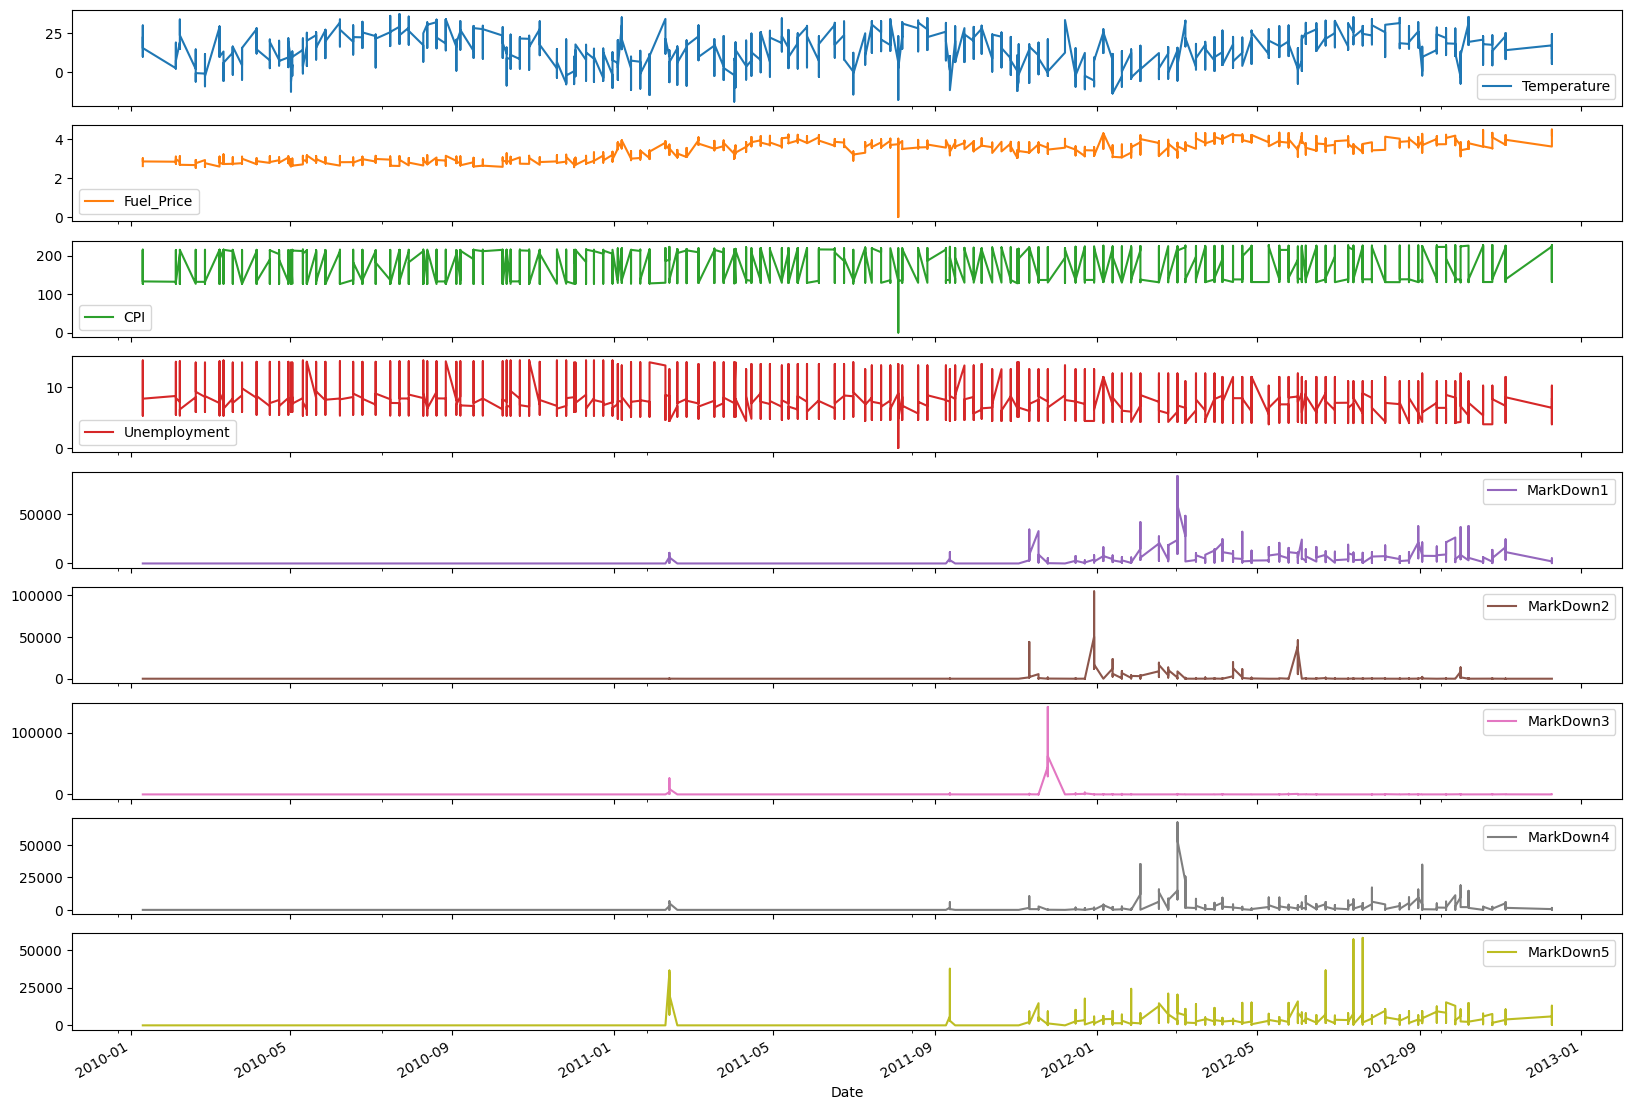

In [27]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

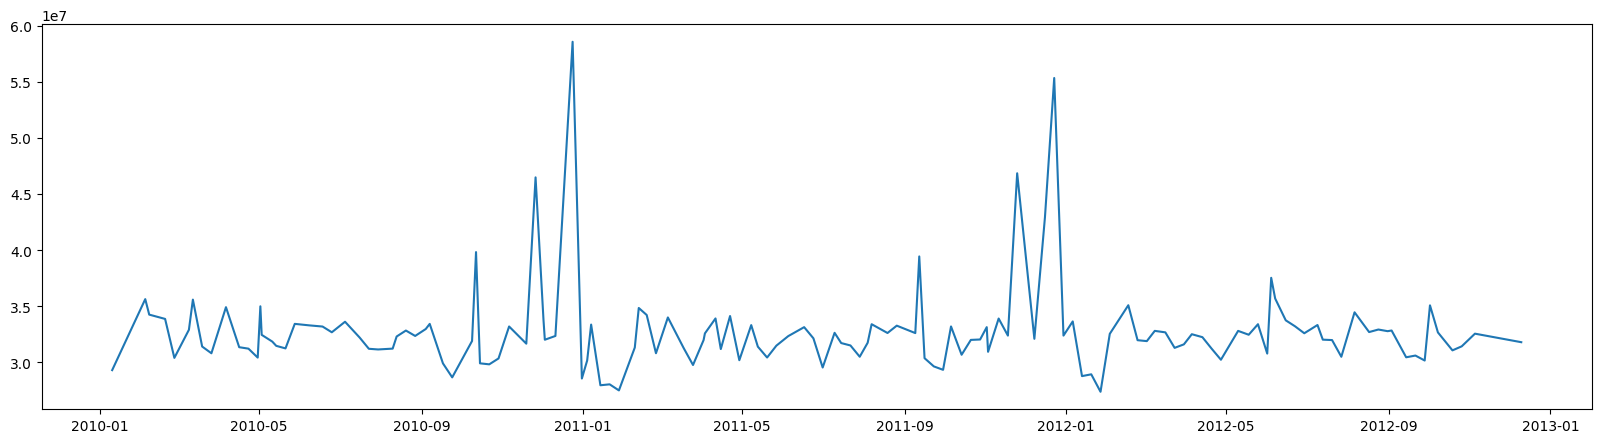

In [28]:
#Sum the weekely sales from every shop to get the total weekly sales volume of the retail chain
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [30]:
df_average_sales.head()

,Date,Weekly_Sales
46,2010-12-24,58570141.38
98,2011-12-23,55342539.12
95,2011-11-25,46853014.26
41,2010-11-26,46487826.94
45,2010-12-17,44463660.28


In [31]:
df_average_sales[::-1].head()

,Date,Weekly_Sales
103,2012-01-27,27382737.47
52,2011-01-28,27503530.12
50,2011-01-14,27963126.73
51,2011-01-21,28045796.18
47,2010-12-31,28565440.11


In [32]:
ts = df_average_sales_week.set_index('Date')

In [34]:
df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,0,3.016518e+09
1,1,1.679643e+09


In [35]:
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


Forecast of the total sales volume

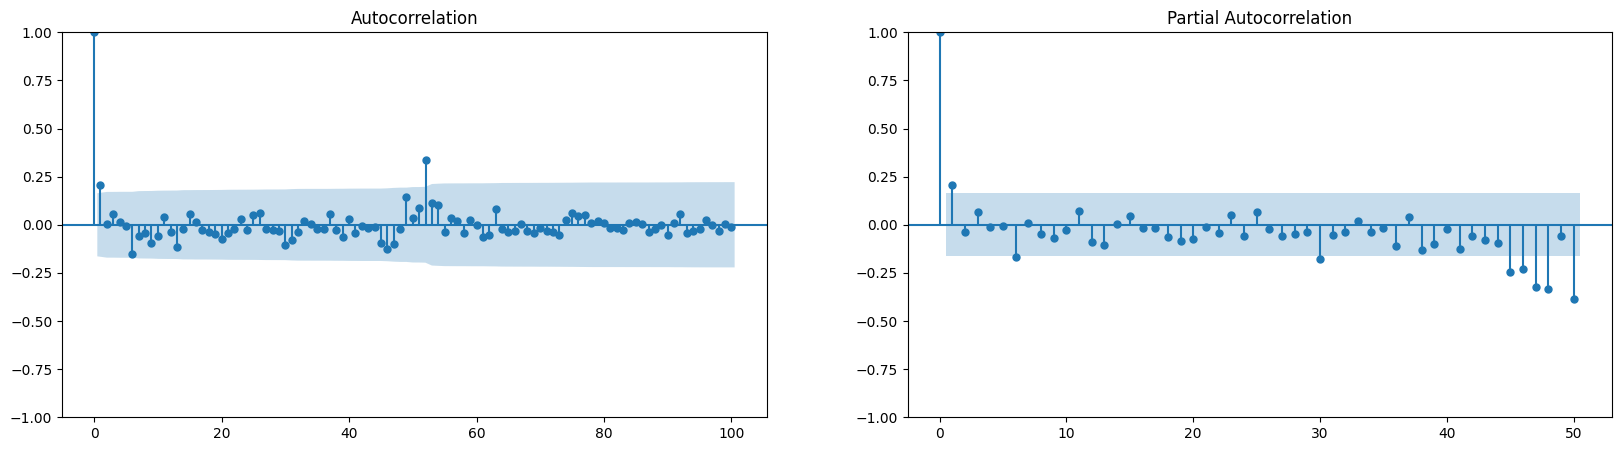

In [40]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=50, ax=axes[1])
plt.show()